## **1. Top-10 Reviewer**

In [245]:
import pandas as pd
import numpy as np
data_path = "./Reviews.csv"

# read file
pd_data = pd.read_csv(data_path)
# choose first 10000 rows
pd_data = pd_data[:10000]
# use userid and profilename
pd_data.set_index(['UserId', 'ProfileName'], inplace=True)
# choose top 10 reviewers
top10 = pd_data.index.value_counts().nlargest(10)

ans_df = pd.DataFrame(columns = ['UserId', 'ProfileName', 'Score count', 'Score mean'])
ans_df['Score mean'] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

for i in range(0, 10):
    ans_df['UserId'][i] = top10.index[i][0]
    ans_df['ProfileName'][i] = top10.index[i][1]
    ans_df['Score count'][i] = top10[i]
    ans_df['Score mean'][i] = round(pd_data.loc[top10.index[i]]['Score'].mean(), 6) 

ans_df.set_index(['UserId', 'ProfileName'], inplace=True)
print(ans_df)

/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may im

                                                          Score count  \
UserId         ProfileName                                              
A1Z54EM24Y40LL c2                                                  17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"          10   
A35R32TA60XD57 M. Torma                                             9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"               8   
A3NHUQ33CFH3VM Citizen John                                         7   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                     7   
A3PJZ8TU8FDQ1K Jared Castle                                         7   
ABQN42N7ICNZQ  T.O. Perspective                                     6   
A3TX6CWSZL02PW LaVerne ":LaVerne"                                   6   
AQ6SHOW0VMZGF  K. Padgett "familyof5"                               6   

                                                           Score mean  
UserId         ProfileName                         

## **2. Plot score distribution for the user with the most number of reviews**

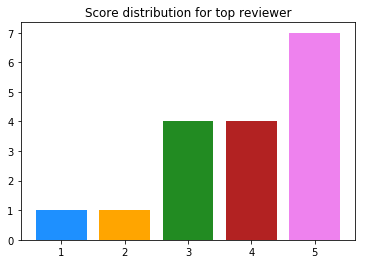

In [327]:
import matplotlib.pyplot as plt

x = pd.value_counts(pd_data.loc[top10.index[0][0]]['Score']).index
y = pd.value_counts(pd_data.loc[top10.index[0][0]]['Score']).values
plt.bar(x, y, color = ['violet', 'firebrick', 'forestgreen', 'orange' , 'dodgerblue'])
plt.title('Score distribution for top reviewer')
plt.show()

## **3. Plot pandas Series DataFrame (Time->Date)**

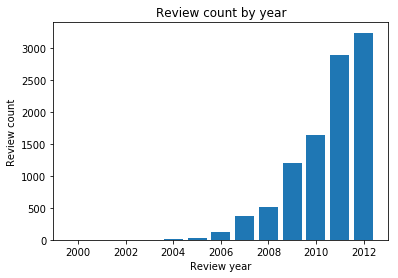

In [360]:
import math
date = (pd_data['Time']/60/60/24/365.25+1970).tolist()
Date = [int(i) for i in date]
x = pd.value_counts(Date).index
y = pd.value_counts(Date).values
plt.bar(x , y)
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')
plt.show()

## **4. Plot HeatMap using seaborn**

## **5. Helpful percent**

(array([5502.,    0.,    0.,    0.,    0.,   65.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

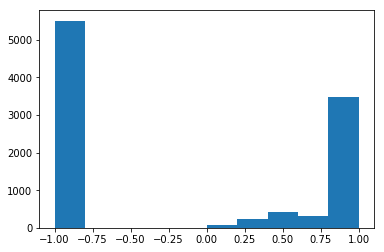

In [361]:
p = (pd_data['HelpfulnessNumerator']/pd_data['HelpfulnessDenominator']).tolist()
for i in range(len(p)):
    if math.isnan(p[i]) or p[i] == 0:
        p[i] = -1
plt.hist(p)